In [2]:
#Importing warning library to avoid any warnings
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

**Loading Train Dataset**

In [3]:
# Importing dataset excel file using pandas.
df = pd.read_csv(r'C:\Users\Yash Bhardwaj\Downloads\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project\train.csv') 
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])
df.head()

No. of Rows : 159571
No. of Columns : 8


,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


- Data set consist of 159571 rows and 8 columns. In this malignant, highly_malignant,rude,threat, abuse and loathe are our target variables 

In [4]:
#checking the datatype
df.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [5]:
#loading the test dataset
df_test = pd.read_csv(r'C:\Users\Yash Bhardwaj\Downloads\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project\test.csv') 
print('No. of Rows :',df_test.shape[0])
print('No. of Columns :',df_test.shape[1])
df_test.head()

No. of Rows : 153164
No. of Columns : 2


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


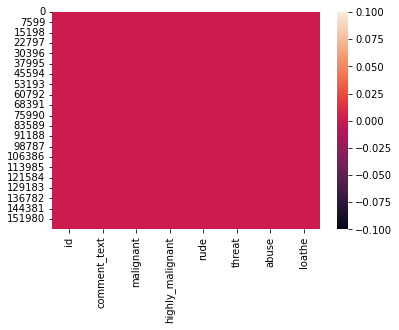

In [6]:
#checking for missing values

sns.heatmap(df.isnull())
plt.show()

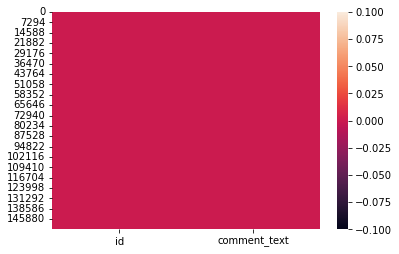

In [7]:
sns.heatmap(df_test.isnull())
plt.show()

- Both the datasets has no missing values present

In [8]:
#exploring target variables

for i in df.columns:
    if df[i].dtypes == 'int64':
        print(df[i].value_counts())
        print("\n=====================\n")

0    144277
1     15294
Name: malignant, dtype: int64


0    157976
1      1595
Name: highly_malignant, dtype: int64


0    151122
1      8449
Name: rude, dtype: int64


0    159093
1       478
Name: threat, dtype: int64


0    151694
1      7877
Name: abuse, dtype: int64


0    158166
1      1405
Name: loathe, dtype: int64




- we can see that its an imbalanced dataset

**Exploratory Data Analysis**

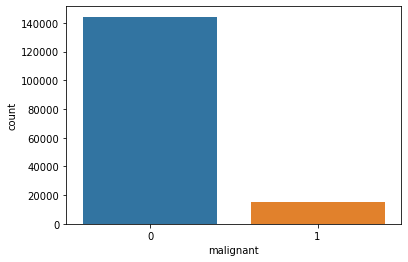

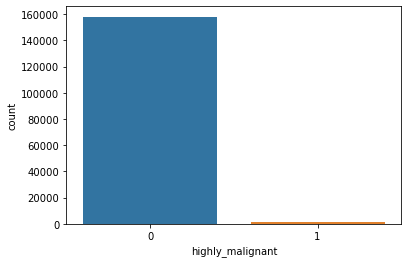

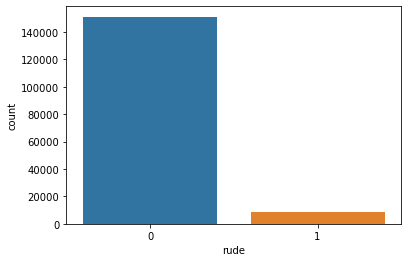

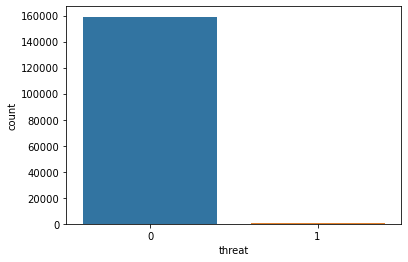

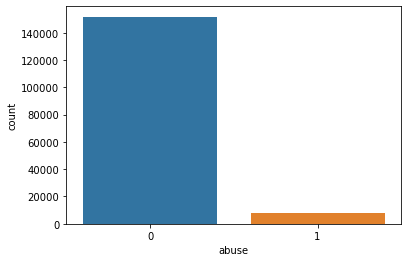

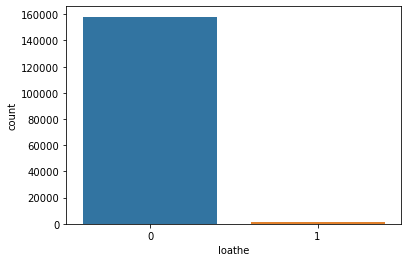

In [9]:
for i in df.columns:
    if df[i].dtypes == 'int64':
        sns.countplot(df[i])
        plt.xlabel(i)
        plt.show()

In [10]:
#Checking the percentage of the comments
label_0 = df[(df['malignant']!=1) & (df['highly_malignant']!=1) & (df['rude']!=1) & 
                            (df['threat']!=1) & (df['abuse']!=1) & (df['loathe']!=1)]

percent=len(label_0)/len(df)*100

print('Percentage of positive or neutral comments = ',round(percent,2),'\n')
print('Percentage of negative comments = ', round((100-percent),2))

Percentage of positive or neutral comments =  89.83 

Percentage of negative comments =  10.17


- Almost around 90% of the comments are positive or neutral while around 10% only are negative ones

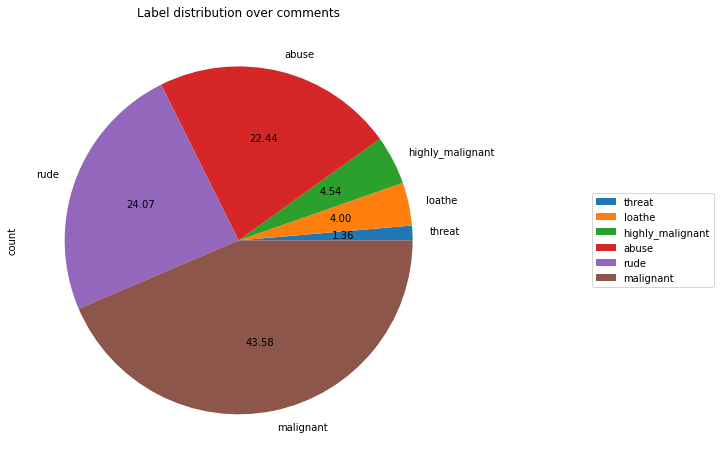

In [11]:
#visualizing the label distribution of comments using pie chart
comments_labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
df_distribution = df[df.columns[2:]].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y = 'count', title = 'Label distribution over comments',
                         autopct='%2.2f', figsize = (8,8))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

Remarks:
- Around 90% comments are Good/Neutral in nature while rest 10% comments are Negative in nature.
- Out of total negative comments around 43.58% are malignant in nature followed by 24.07% are rude comments.


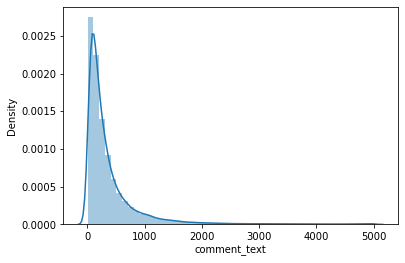

In [12]:
#plotting the comment length
sns.distplot(df['comment_text'].str.len())
plt.show()

In [13]:
#checking the correlation
df.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


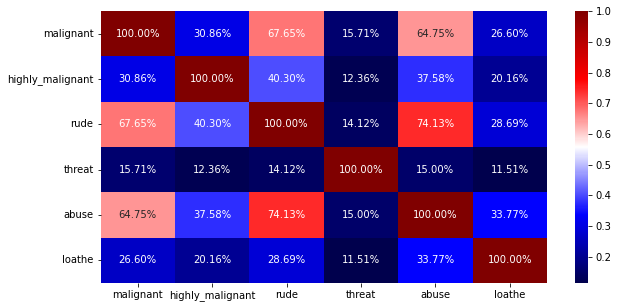

In [14]:
#visualizing the correlation using a heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.corr() , cmap='seismic' , annot=True , fmt='.2%')
plt.show()

- The highest positive correlation is seen in between fields 'rude' and 'abuse'.

- Attribute 'threat' is least correlated with each and every other feature

**Data Preprocessing**

In [15]:
#As ID is not important, we can drop from both datasets
df.drop('id',axis=1,inplace=True)
df_test.drop('id',axis=1,inplace=True)

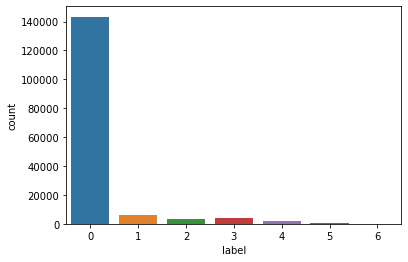

In [16]:
#Checking the count of labels
df['label']=df[comments_labels].sum(axis=1)
sns.countplot(df['label'])
plt.show()

In [17]:
#adding a column with length of the texts for both the datasets

df['Length'] = df['comment_text'].str.len()
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,Length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67


In [18]:
df_test['Length'] = df_test['comment_text'].str.len()
df_test.head()

,comment_text,Length
0,Yo bitch Ja Rule is more succesful then you'll...,367
1,== From RfC == \n\n The title is fine as it is...,50
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,":If you have a look back at the source, the in...",205
4,I don't anonymously edit articles at all.,41


**Text Preprocessing**

In [19]:
#Importing Required libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
#Defining the stop words
stop_words = stopwords.words('english')

#Defining the lemmatizer
lemmatizer = WordNetLemmatizer()

In [21]:
#Replacing '\n' in comment_text for both datasets
df['comment_text'] = df['comment_text'].str.replace('\n',' ')
df_test['comment_text'] = df_test['comment_text'].str.replace('\n',' ')

In [22]:
def deconstructed(phrase):
    
    phrase = phrase.lower()
    phrase = re.sub(r"’","'",str(phrase))
    phrase = re.sub(r"“",'"',str(phrase))
    phrase = re.sub(r"”",'"',str(phrase))
    phrase = re.sub(r"[0-9]+" , "numbr", str(phrase))           #replacing any digits present with 'numbr'
    phrase = re.sub(r'[^\w\d\s]',' ',str(phrase))             #removing punctuation
    phrase = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', str(phrase))
    phrase = re.sub(r'http\S+', 'webaddress', str(phrase))
    phrase = re.sub(r"<.*?>", " ", str(phrase))
    phrase = re.sub(r'[^\w\s]', ' ', str(phrase))
    phrase = re.sub(r'\_',' ',str(phrase))
    return phrase

In [23]:
import string
punct = string.punctuation

In [24]:
from tqdm import tqdm        #importing tqdm to check the progress
preprocessed_comment = []    #empty list for clean content
for sentence in tqdm(df['comment_text'].values):
    sent = deconstructed(sentence)    #using the defined function
    sent = ' '.join(lemmatizer.lemmatize(word) for word in nltk.word_tokenize(sent) if word not in stop_words)
    preprocessed_comment.append(sent.strip())  

100%|█████████████████████████████████████████████████████████████████████████| 159571/159571 [02:56<00:00, 904.78it/s]


In [25]:
df['comment_text'] = preprocessed_comment
df['Clean_length'] = df['comment_text'].str.len()
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,Length,Clean_length
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,0,264,180
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,0,112,91
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,0,233,141
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,0,622,364
4,sir hero chance remember page,0,0,0,0,0,0,0,67,29


In [26]:
# Checking Total length removal in train dataset
print("Original Length:", df.Length.sum())
print("Cleaned Length:", df.Clean_length.sum())
print("Total Words Removed:", (df.Length.sum()) - (df.Clean_length.sum()))

Original Length: 62893130
Cleaned Length: 40109606
Total Words Removed: 22783524


In [27]:
#applying the same steps on test dataset as well

from tqdm import tqdm        #importing tqdm to check the progress
preprocessed_comment_test = []    #empty list for clean content
for sentence in tqdm(df_test['comment_text'].values):
    sent = deconstructed(sentence)    #using the defined function
    sent = ' '.join(lemmatizer.lemmatize(word) for word in nltk.word_tokenize(sent) if word not in stop_words)
    preprocessed_comment_test.append(sent.strip())  
    
df_test['comment_text'] = preprocessed_comment_test
df_test['Clean_length'] = df_test['comment_text'].str.len()

# Checking Total length removal in test dataset
print("Original Length:", df_test.Length.sum())
print("Cleaned Length:", df_test.Clean_length.sum())
print("Total Words Removed:", (df_test.Length.sum()) - (df_test.Clean_length.sum()))

100%|█████████████████████████████████████████████████████████████████████████| 153164/153164 [02:36<00:00, 979.96it/s]


Original Length: 55885733
Cleaned Length: 35503099
Total Words Removed: 20382634


In [28]:
df_test.head()

,comment_text,Length,Clean_length
0,yo bitch ja rule succesful ever whats hating s...,367,235
1,rfc title fine imo,50,18
2,source zawe ashton lapland,54,26
3,look back source information updated correct f...,205,109
4,anonymously edit article,41,24


**Word Cloud**

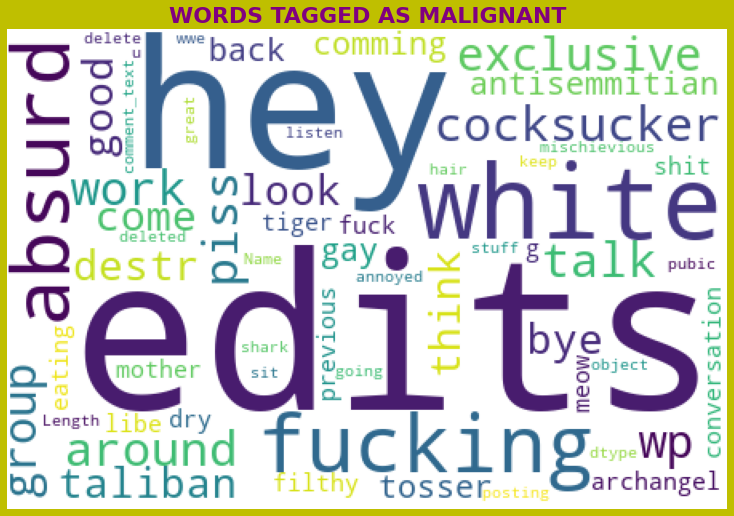

In [29]:
# Plotting for malignant
df_malignant=df[(df['malignant']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_malignant['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS MALIGNANT',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

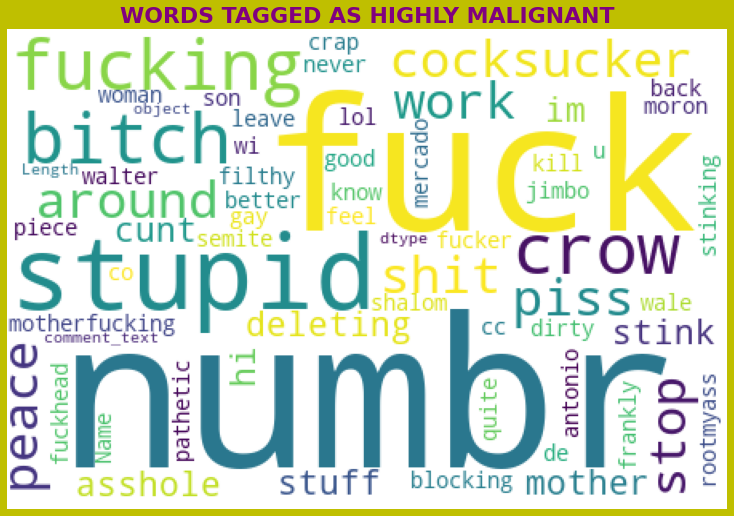

In [30]:
# Plotting for highly_malignant
df_highlymalignant=df[(df['highly_malignant']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_highlymalignant['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS HIGHLY MALIGNANT',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

- For highly maligant comments 'numbr' which was substituted in place of digits seems to be important word

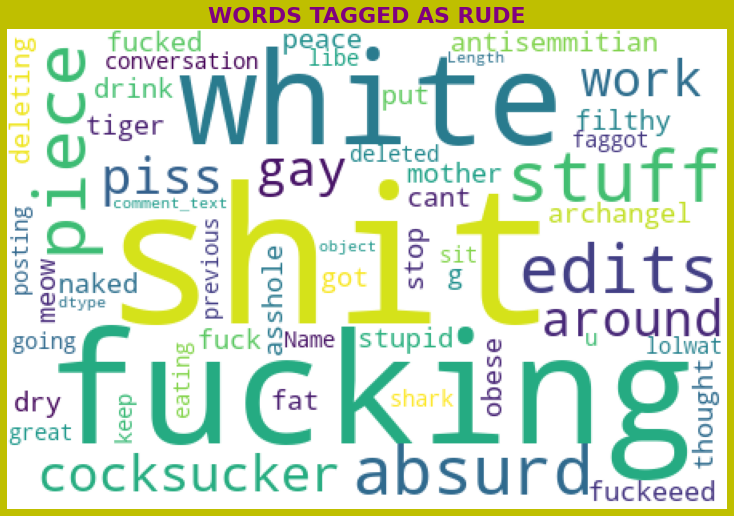

In [31]:
# Plotting for rude
df_rude=df[(df['rude']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_rude['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS RUDE',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

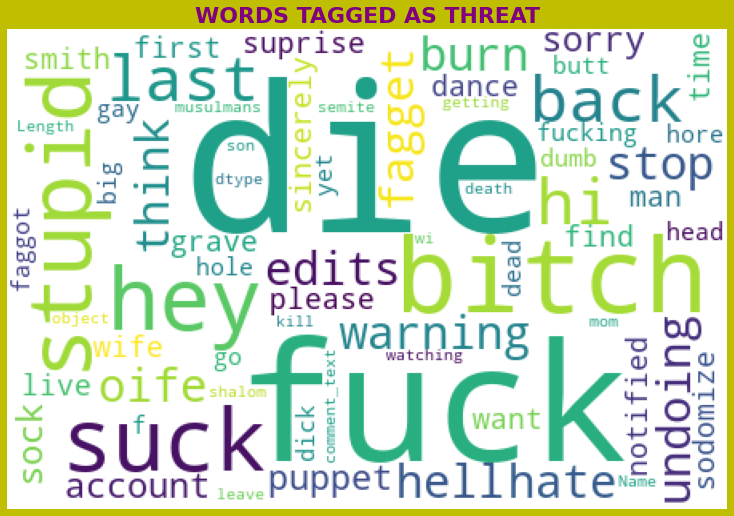

In [32]:
# Plotting for threat
df_threat=df[(df['threat']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_threat['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS THREAT',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

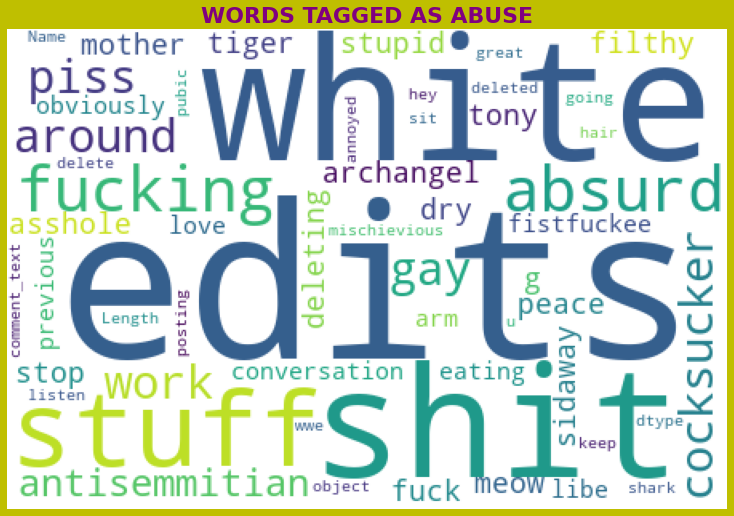

In [33]:
# Plotting for abuse
df_abuse=df[(df['abuse']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_abuse['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS ABUSE',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

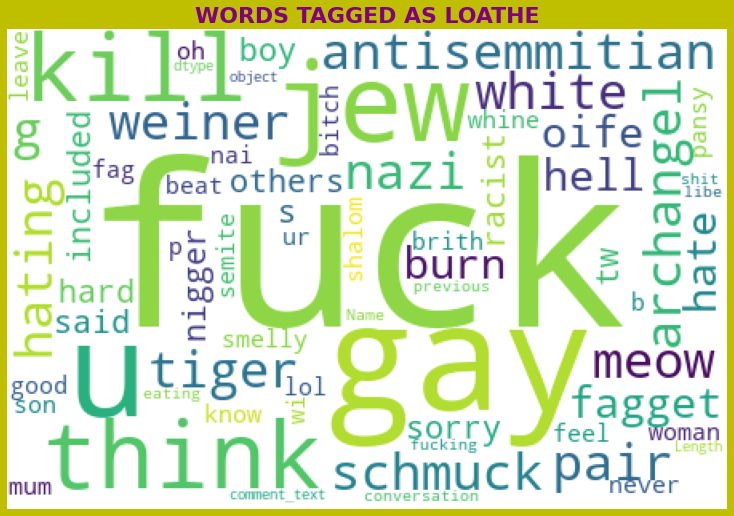

In [34]:
# Plotting for loathe
df_loathe=df[(df['loathe']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_loathe['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS LOATHE',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

**Vectorization and Split**

In [35]:
tf_vec = TfidfVectorizer(max_features = 2000, stop_words='english')

In [36]:
X = tf_vec.fit_transform(df['comment_text']).toarray()

In [37]:
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,Length,Clean_length
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,0,264,180
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,0,112,91
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,0,233,141
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,0,622,364
4,sir hero chance remember page,0,0,0,0,0,0,0,67,29


In [38]:
output_labels= df.columns[1:7]

In [39]:
# output variables
from scipy.sparse import csr_matrix
Y = csr_matrix(df[output_labels]).toarray()

# checking shapes of input and output variables to take care of data imbalance issue
print("Input Variable Shape:", X.shape)
print("Output Variable Shape:", Y.shape)

Input Variable Shape: (159571, 2000)
Output Variable Shape: (159571, 6)


In [40]:
#applying the same for test dataset

test_vec = tf_vec.fit_transform(df_test['comment_text'])
print("Test Input Variable Shape:", test_vec.shape)

Test Input Variable Shape: (153164, 2000)


**Model Building**

In [41]:
#Importing Machine learning Model library
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC, LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import hamming_loss, log_loss

In [44]:
#taking one fourth of the total dataset for training purpose

half = len(df)//4

1. Logistic Regression

In [45]:
x_train,x_test,y_train,y_test = train_test_split(X[:half,:],Y[:half,:],test_size=0.33,random_state=42)
lr =  LogisticRegression()
br_clf = BinaryRelevance(classifier=lr,require_dense=[True,True])
br_clf.fit(x_train,y_train)
predict_lr = br_clf.predict(x_test)        

In [47]:
ham_loss = hamming_loss(y_test,predict_lr)
print('Hamming Loss :',ham_loss)
                
ac_score = accuracy_score(y_test,predict_lr)
print("\nAccuracy Score :",ac_score)
        
cl_report = classification_report(y_test,predict_lr)
print("\nClassification Report :",cl_report)

Hamming Loss : 0.022129383466261553

Accuracy Score : 0.9124952525636156

Classification Report :               precision    recall  f1-score   support

           0       0.92      0.51      0.66      1281
           1       0.62      0.17      0.27       150
           2       0.95      0.54      0.69       724
           3       0.00      0.00      0.00        44
           4       0.81      0.44      0.57       650
           5       0.94      0.14      0.24       109

   micro avg       0.89      0.46      0.61      2958
   macro avg       0.71      0.30      0.41      2958
weighted avg       0.87      0.46      0.60      2958
 samples avg       0.05      0.04      0.04      2958



2. XGB Classifier

In [48]:
xgb =  XGBClassifier()
br_clf = BinaryRelevance(classifier=xgb,require_dense=[True,True])
br_clf.fit(x_train,y_train)
predict_xgb = br_clf.predict(x_test)      

In [49]:
ham_loss = hamming_loss(y_test,predict_xgb)
print('Hamming Loss :',ham_loss)
                
ac_score = accuracy_score(y_test,predict_xgb)
print("\nAccuracy Score :",ac_score)
        
cl_report = classification_report(y_test,predict_xgb)
print("\nClassification Report :",cl_report)

Hamming Loss : 0.021395113305481706

Accuracy Score : 0.9109001139384733

Classification Report :               precision    recall  f1-score   support

           0       0.87      0.54      0.67      1281
           1       0.51      0.21      0.30       150
           2       0.91      0.67      0.77       724
           3       0.46      0.14      0.21        44
           4       0.75      0.50      0.60       650
           5       0.70      0.28      0.41       109

   micro avg       0.84      0.53      0.65      2958
   macro avg       0.70      0.39      0.49      2958
weighted avg       0.82      0.53      0.64      2958
 samples avg       0.05      0.05      0.05      2958



3. Support Vector Classifier

In [50]:
svc = LinearSVC(max_iter = 3000)
br_clf = BinaryRelevance(classifier=xgb,require_dense=[True,True])
br_clf.fit(x_train,y_train)
predict_svc = br_clf.predict(x_test)      

In [51]:
ham_loss = hamming_loss(y_test,predict_svc)
print('Hamming Loss :',ham_loss)
                
ac_score = accuracy_score(y_test,predict_svc)
print("\nAccuracy Score :",ac_score)
        
cl_report = classification_report(y_test,predict_svc)
print("\nClassification Report :",cl_report)

Hamming Loss : 0.021395113305481706

Accuracy Score : 0.9109001139384733

Classification Report :               precision    recall  f1-score   support

           0       0.87      0.54      0.67      1281
           1       0.51      0.21      0.30       150
           2       0.91      0.67      0.77       724
           3       0.46      0.14      0.21        44
           4       0.75      0.50      0.60       650
           5       0.70      0.28      0.41       109

   micro avg       0.84      0.53      0.65      2958
   macro avg       0.70      0.39      0.49      2958
weighted avg       0.82      0.53      0.64      2958
 samples avg       0.05      0.05      0.05      2958



4. Ada Boost Classifier

In [52]:
ada = AdaBoostClassifier()
br_clf = BinaryRelevance(classifier=ada,require_dense=[True,True])
br_clf.fit(x_train,y_train)
predict_ada = br_clf.predict(x_test)      

In [53]:
ham_loss = hamming_loss(y_test,predict_ada)
print('Hamming Loss :',ham_loss)
                
ac_score = accuracy_score(y_test,predict_ada)
print("\nAccuracy Score :",ac_score)
        
cl_report = classification_report(y_test,predict_ada)
print("\nClassification Report :",cl_report)

Hamming Loss : 0.023446005823521965

Accuracy Score : 0.9043676414736043

Classification Report :               precision    recall  f1-score   support

           0       0.82      0.53      0.64      1281
           1       0.47      0.24      0.32       150
           2       0.89      0.62      0.73       724
           3       0.50      0.18      0.27        44
           4       0.72      0.44      0.55       650
           5       0.54      0.28      0.37       109

   micro avg       0.80      0.50      0.62      2958
   macro avg       0.66      0.38      0.48      2958
weighted avg       0.79      0.50      0.61      2958
 samples avg       0.05      0.04      0.04      2958



- Both SVC and XGBClassifier are working better than the rest other.
- We will choose SVC as our final model

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
fmod_param = {'estimator__penalty' : ['l1', 'l2'],
              'estimator__loss' : ['hinge', 'squared_hinge'],
              'estimator__multi_class' : ['ovr', 'crammer_singer'],
              'estimator__random_state' : [42, 72, 111] }
#SVC = BinaryRelevance(classifier=LinearSVC(),require_dense=[True,True])           
SVC = OneVsRestClassifier(LinearSVC())
GSCV = GridSearchCV(SVC, fmod_param, cv=3,verbose = 10)
x_train,x_test,y_train,y_test = train_test_split(X[:half,:], Y[:half,:], test_size=0.30, random_state=42)
GSCV.fit(x_train,y_train)
GSCV.best_params_

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3; 1/24] START estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=42
[CV 1/3; 1/24] END estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=42;, score=nan total time=   0.6s
[CV 2/3; 1/24] START estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=42
[CV 2/3; 1/24] END estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=42;, score=nan total time=   0.3s
[CV 3/3; 1/24] START estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=42
[CV 3/3; 1/24] END estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=42;, score=nan total time=   0.4s
[CV 1/3; 2/24] START estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=7

{'estimator__loss': 'hinge',
 'estimator__multi_class': 'crammer_singer',
 'estimator__penalty': 'l1',
 'estimator__random_state': 42}

**Final Model**

In [59]:
Final_Model = OneVsRestClassifier(LinearSVC(loss='hinge', 
            multi_class='crammer_singer', penalty='l1', random_state=42))

Classifier = Final_Model.fit(x_train, y_train)
final_pred = Final_Model.predict(x_test)
final_acc = (accuracy_score(y_test, final_pred))*100
print("Accuracy score for the Best Model is:", final_acc)
h_loss_final = hamming_loss(y_test,final_pred)*100
print("Hamming loss for the Best Model is:", h_loss_final)

Accuracy score for the Best Model is: 91.30180481283422
Hamming loss for the Best Model is: 2.0568738859180034


- We can see the improvement in the model's accuracy.
- Earlier it was **91.09** now it is coming out to be **91.30**

In [61]:
from sklearn.metrics import multilabel_confusion_matrix , classification_report
print("Confusion matrix:\n", multilabel_confusion_matrix(y_test, final_pred))
print("\nClassification report:\n",classification_report(y_test, final_pred))

Confusion matrix:
 [[[10702    91]
  [  484   691]]

 [[11824     9]
  [  126     9]]

 [[11266    44]
  [  226   432]]

 [[11922     8]
  [   34     4]]

 [[11269   103]
  [  277   319]]

 [[11866     6]
  [   69    27]]]

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.59      0.71      1175
           1       0.50      0.07      0.12       135
           2       0.91      0.66      0.76       658
           3       0.33      0.11      0.16        38
           4       0.76      0.54      0.63       596
           5       0.82      0.28      0.42        96

   micro avg       0.85      0.55      0.67      2698
   macro avg       0.70      0.37      0.47      2698
weighted avg       0.83      0.55      0.65      2698
 samples avg       0.05      0.05      0.05      2698



**Saving the model**

In [62]:
# selecting the best model
best_model = OneVsRestClassifier(LinearSVC(loss='hinge', 
            multi_class='crammer_singer', penalty='l1', random_state=42))

# saving the best classification model
import pickle
pickle.dump(best_model,open('Malignant_comments_classifier.pkl','wb'))

**Predicting with saved model**

In [65]:
import pickle
best_model = pickle.load(open('Malignant_comments_classifier.pkl','rb'))

In [67]:
# Make predictions and view the results
best_model.fit(x_train,y_train)
predict_test = best_model.predict(test_vec.toarray())

In [68]:
#making a dataframe for the predicted data
pred_df = pd.DataFrame(predict_test)
pred_df

,0,1,2,3,4,5
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
153159,0,0,0,0,0,0
153160,0,0,0,0,0,0
153161,0,0,0,0,0,0
153162,0,0,0,0,0,0


In [69]:
#renaming the columns
pred_df.rename({'0':'malignant', '1':'highly_malignant', '2':'rude', '3':'threat', '4':'abuse', '5':'loathe'}, 
           axis='columns', inplace=True)

In [70]:
#saving in csv format
pred_df.to_csv('malignant_comments_predctions.csv', index=False)